In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Reading the dataset and analyzing it.***

In [5]:
dataset = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
uni = dataset.customerID.unique()
len(uni)

7043

In [8]:
dataset = dataset.drop(columns=['customerID'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
dataset.TotalCharges=pd.to_numeric(dataset.TotalCharges)

ValueError: Unable to parse string " " at position 488

When we try to convert the TotalCharges object classes it throws the error because it has some empty strings which cannot be converted into the numeric data.

*   So first we need to replace the empty strings to the null values.
*   Then we need to change the datatype into numeric. Now it will not throw any error.
*   Then identify the median values of the dataset.
*   Replace the null values with the median value.





In [12]:
dataset.eq(' ').sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
dataset['TotalCharges'] = dataset['TotalCharges'].replace(' ', np.nan)
dataset.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
dataset.eq(' ').sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
dataset.TotalCharges=pd.to_numeric(dataset.TotalCharges)

In [16]:
dataset.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [17]:
total_charge_median = dataset['TotalCharges'].median()
print(total_charge_median)
dataset['TotalCharges'].fillna(total_charge_median, inplace=True)
dataset['TotalCharges'].isnull().sum()

1397.475


0

Now we are filtering the object datatype seperately and visualizing the dataset and analyzing the different useful features from it.

In [18]:
columns = dataset.columns

In [19]:
columns_obj_dt = dataset.select_dtypes(include='object').columns
print(columns_obj_dt)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


Determing the unique classes in each column features.

In [20]:
for i in columns_obj_dt:
    unique_values = dataset[i].unique()
    print("column : "+i+" --> "+str(list(unique_values))+" --> "+"has unique classes of "+str(len(unique_values)))

column : gender --> ['Female', 'Male'] --> has unique classes of 2
column : Partner --> ['Yes', 'No'] --> has unique classes of 2
column : Dependents --> ['No', 'Yes'] --> has unique classes of 2
column : PhoneService --> ['No', 'Yes'] --> has unique classes of 2
column : MultipleLines --> ['No phone service', 'No', 'Yes'] --> has unique classes of 3
column : InternetService --> ['DSL', 'Fiber optic', 'No'] --> has unique classes of 3
column : OnlineSecurity --> ['No', 'Yes', 'No internet service'] --> has unique classes of 3
column : OnlineBackup --> ['Yes', 'No', 'No internet service'] --> has unique classes of 3
column : DeviceProtection --> ['No', 'Yes', 'No internet service'] --> has unique classes of 3
column : TechSupport --> ['No', 'Yes', 'No internet service'] --> has unique classes of 3
column : StreamingTV --> ['No', 'Yes', 'No internet service'] --> has unique classes of 3
column : StreamingMovies --> ['No', 'Yes', 'No internet service'] --> has unique classes of 3
column :

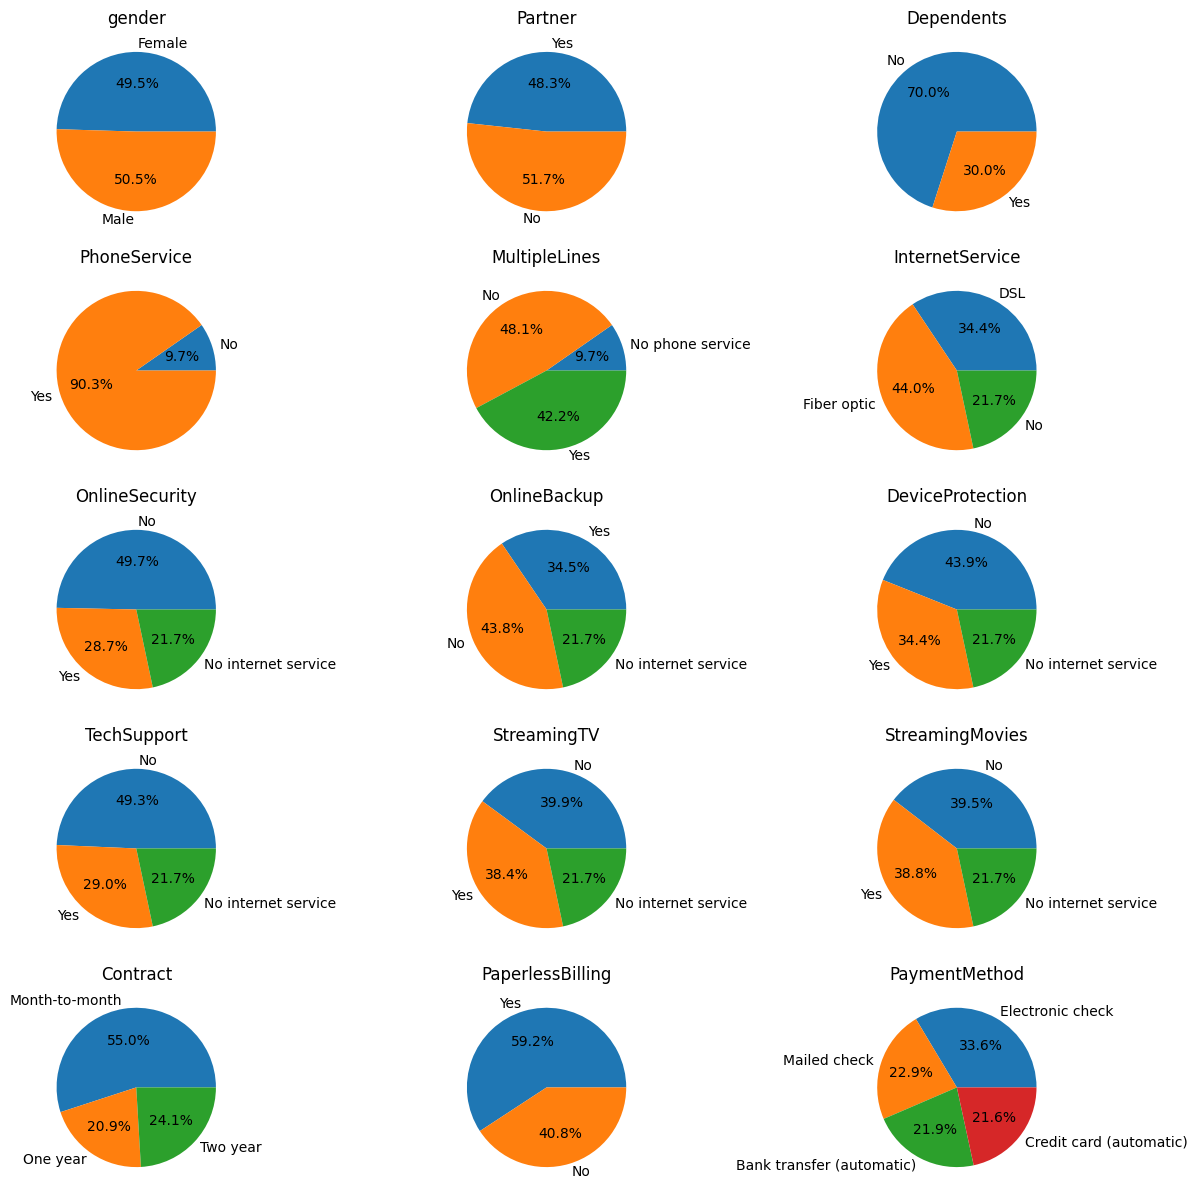

In [21]:
temp1 = 1
plt.figure(figsize=(15,15))
for i in columns_obj_dt[:-1]:
    plt.subplot(5,3,temp1)
    temp = []
    for j in list(dataset[i].unique()):
        temp.append(dataset[dataset[i]==j][i].count())
    plt.pie(temp,labels = list(dataset[i].unique()), autopct='%1.1f%%')
    plt.title(dataset.loc[:,i].name)
    temp1+=1
plt.show()

Visualizing the distribution of the target funtion

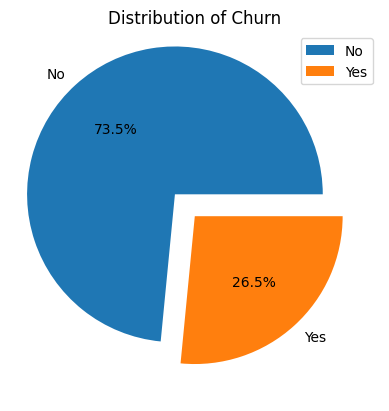

In [22]:
temp1 = []
for i in list(dataset['Churn'].unique()):
    temp1.append(dataset[dataset['Churn'] == i]['Churn'].count())
explode = [0.2,0]
plt.pie(temp1,labels = list(dataset['Churn'].unique()), autopct='%1.1f%%',explode=explode)
plt.title('Distribution of Churn')
plt.legend()
plt.show()

## ***Distribution of dataset over the yes in churn column***


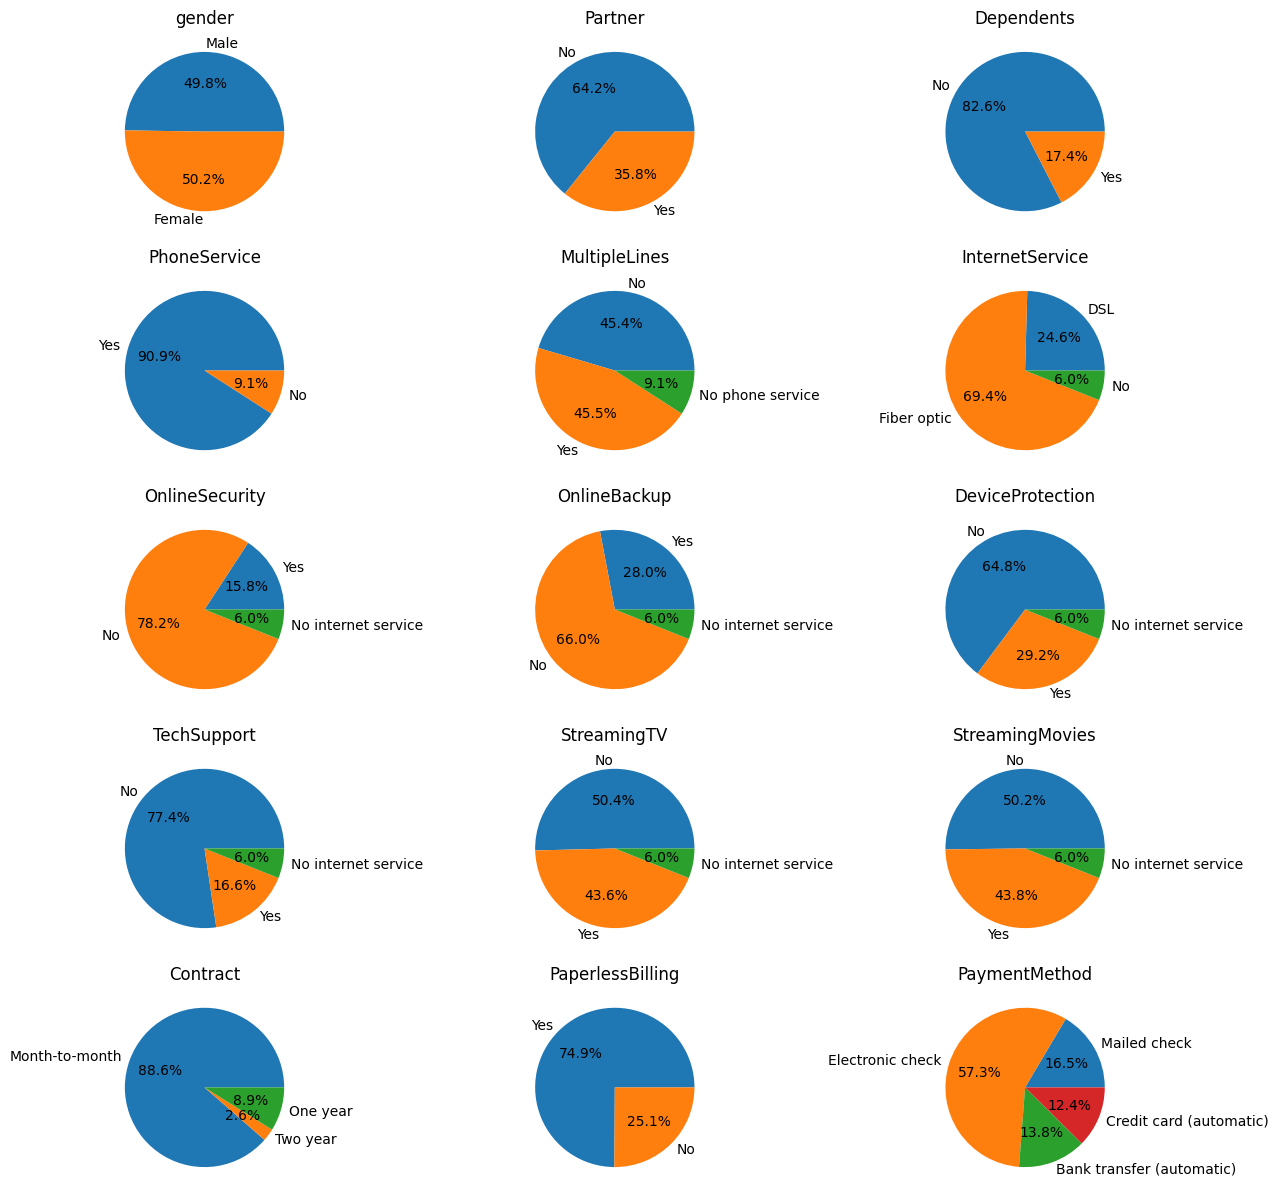

In [23]:
data = dataset[dataset['Churn'] == 'Yes']
temp1 = 1
plt.figure(figsize=(15,15))
for i in columns_obj_dt[:-1]:
    plt.subplot(5,3,temp1)
    temp = []
    for j in list(data[i].unique()):
        temp.append(data[data[i]==j][i].count())
    plt.pie(temp,labels = list(data[i].unique()), autopct='%1.1f%%')
    plt.title(data.loc[:,i].name)
    temp1+=1
plt.show()

## ***Distribution of dataset over the No in churn column***

---



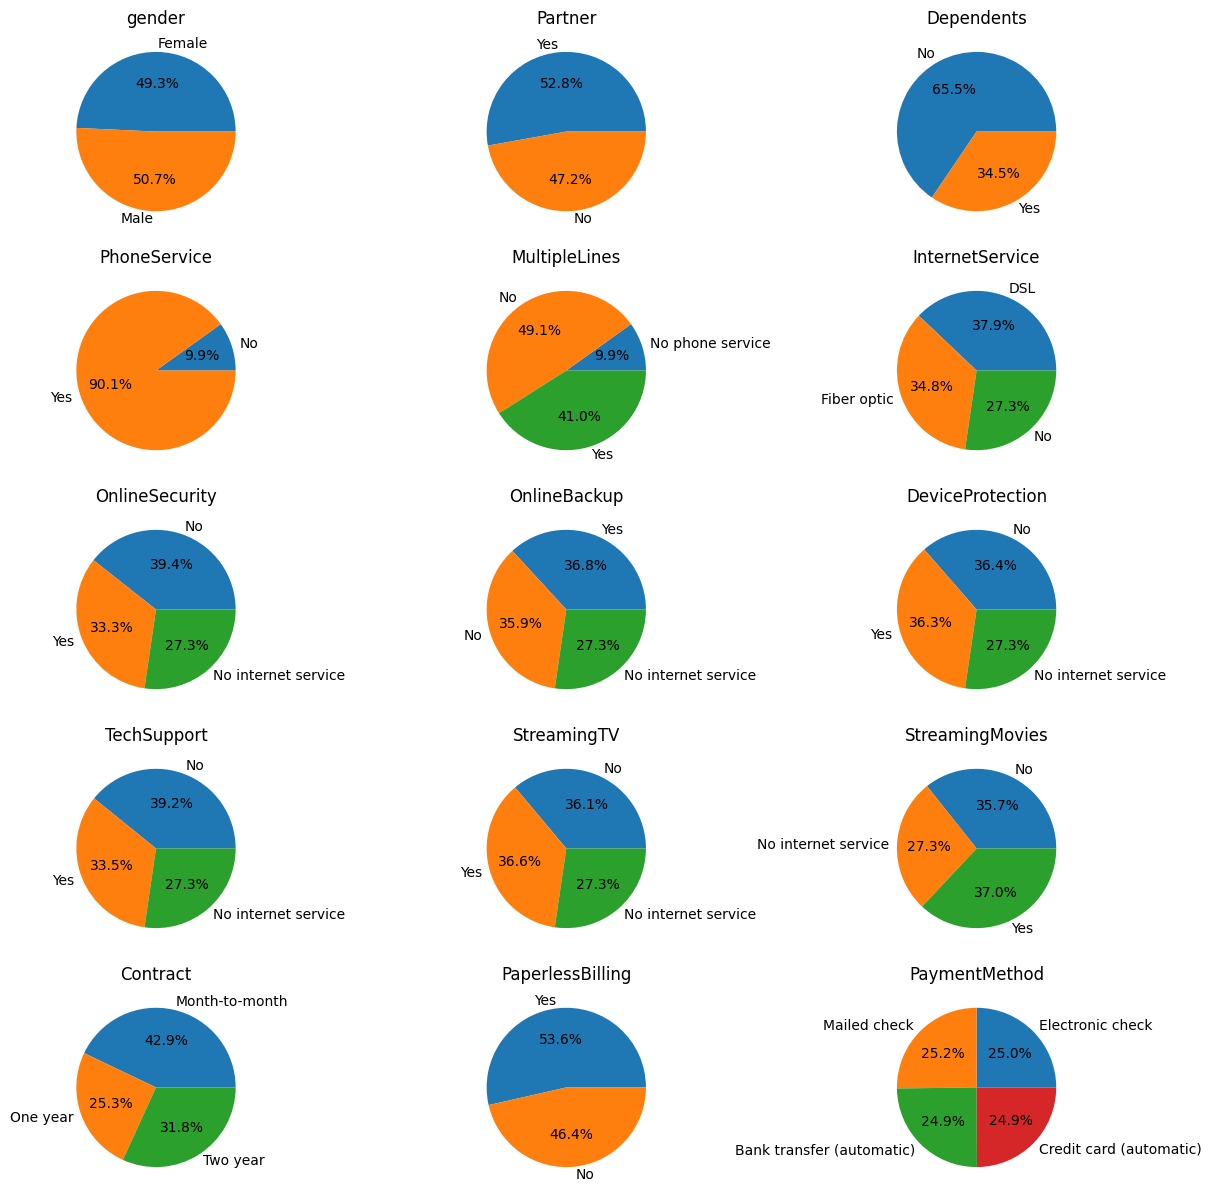

In [24]:
data = dataset[dataset['Churn'] == 'No']
temp1 = 1
plt.figure(figsize=(15,15))
for i in columns_obj_dt[:-1]:
    plt.subplot(5,3,temp1)
    temp = []
    for j in list(data[i].unique()):
        temp.append(data[data[i]==j][i].count())
    plt.pie(temp,labels = list(data[i].unique()), autopct='%1.1f%%')
    plt.title(data.loc[:,i].name)
    temp1+=1
plt.show()

Filtering out Numeric columns and analyzing it

In [25]:
columns_int_dt = list(dataset.select_dtypes(include='int64').columns)
columns_flo_dt = list(dataset.select_dtypes(include='float64').columns)
columns_num_dt = columns_int_dt+columns_flo_dt
print(columns_num_dt)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


Histogram of numeric dataset towards the target

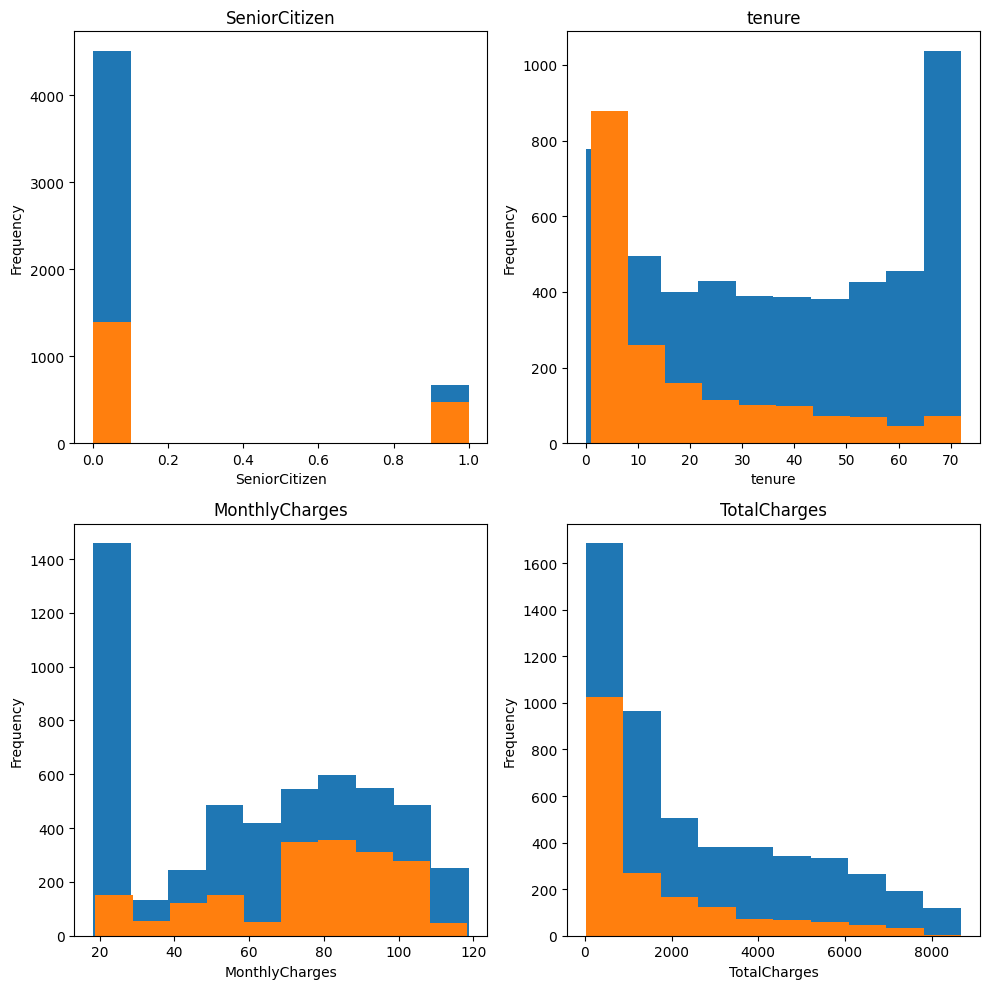

In [26]:
plt.figure(figsize=(10,10))
for i in range(len(columns_num_dt)):
    plt.subplot(2,2,i+1)
    plt.hist(dataset[dataset['Churn']=='No'][columns_num_dt[i]])
    plt.hist(dataset[dataset['Churn']=='Yes'][columns_num_dt[i]])
    plt.title(dataset.loc[:,columns_num_dt[i]].name)
    plt.xlabel(dataset.loc[:,columns_num_dt[i]].name)
    plt.ylabel('Frequency')
    plt.tight_layout()
plt.show()

Total sum of the dataset for each classes in the target funtion

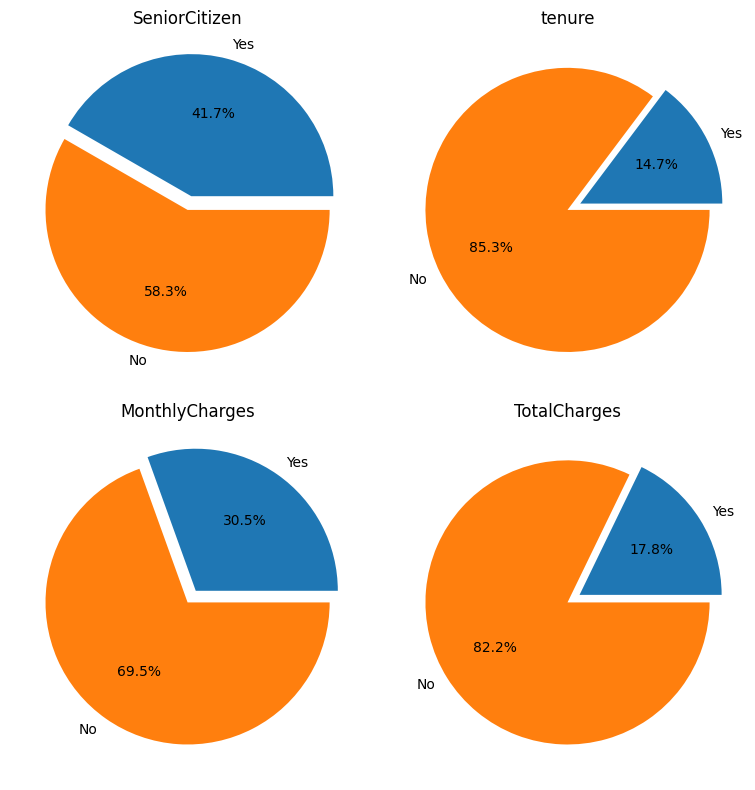

In [27]:
plt.figure(figsize=(8,8))
for i in range(len(columns_num_dt)):
    plt.subplot(2,2,i+1)
    yes_chu = dataset[dataset['Churn'] == 'Yes'][columns_num_dt[i]].sum()
    no_chu = dataset[dataset['Churn'] == 'No'][columns_num_dt[i]].sum()
    plt.pie([yes_chu,no_chu],labels = ['Yes','No'], autopct='%1.1f%%',explode=[0.1,0])
    plt.title(columns_num_dt[i])
    plt.tight_layout()
plt.show()

In [28]:
dummy1 = dataset[dataset['gender'] == 'Female']
dummy2 = dataset[dataset['gender'] == 'Male']
total_charge_female = dummy1['TotalCharges'].sum()
total_charge_male = dummy2['TotalCharges'].sum()
print(total_charge_female)
print(total_charge_male)

7959341.575
8112199.35


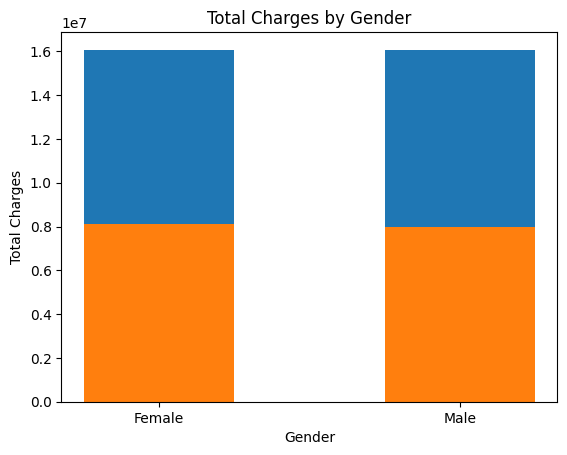

In [29]:
plt.bar(list(dataset['gender'].unique()),height=[dataset['TotalCharges'].sum(),dataset['TotalCharges'].sum()], width=0.5)
plt.bar(list(dataset['gender'].unique()),height=[total_charge_male,total_charge_female], width=0.5)
plt.xlabel('Gender')
plt.ylabel('Total Charges')
plt.title('Total Charges by Gender')
plt.show()

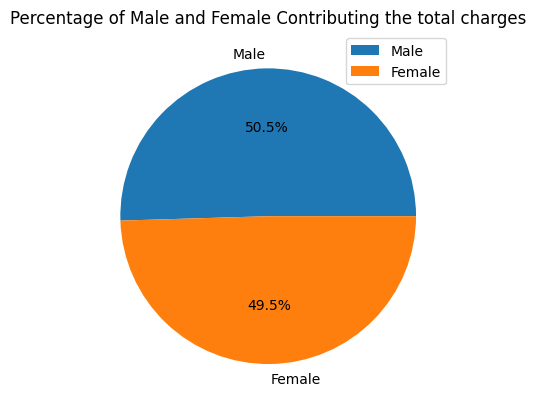

In [30]:
percentage_male = (total_charge_male/dataset['TotalCharges'].sum())*100
percentage_female = total_charge_female/dataset['TotalCharges'].sum()*100
plt.pie([percentage_male,percentage_female],labels = ['Male','Female'], autopct='%1.1f%%')
plt.title('Percentage of Male and Female Contributing the total charges')
plt.legend()
plt.show()

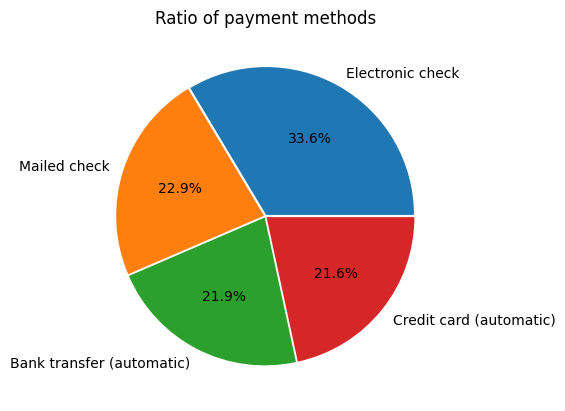

In [31]:
temp = []
for i in list(dataset['PaymentMethod'].unique()):
    temp.append(dataset[dataset['PaymentMethod'] == i]['PaymentMethod'].count())
plt.pie(temp,labels = list(dataset['PaymentMethod'].unique()), autopct='%1.1f%%',explode=[0.01,0.01,0.01,0.01])
plt.title("Ratio of payment methods")
plt.show()

## ***Changing the data's into numerical data, introducing the model, calculating the metrics***

In [33]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
import warnings
warnings.filterwarnings("ignore")

In [34]:
data_LE = dataset.copy()
for i in columns_obj_dt:
    data_LE[i] = LabelEncoder().fit_transform(data_LE[i])

In [35]:
data_LE.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [36]:
data_OHE = dataset.copy()
for i in columns_obj_dt:
    data_OHE[i] = OneHotEncoder().fit_transform(data_OHE[[i]]).toarray()

In [37]:
data_OHE.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1.0,0,0.0,1.0,1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,29.85,29.85,1.0
1,0.0,0,1.0,1.0,34,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,56.95,1889.50,1.0
2,0.0,0,1.0,1.0,2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,53.85,108.15,0.0
3,0.0,0,1.0,1.0,45,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,42.30,1840.75,1.0
4,1.0,0,1.0,1.0,2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,70.70,151.65,0.0


In [38]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


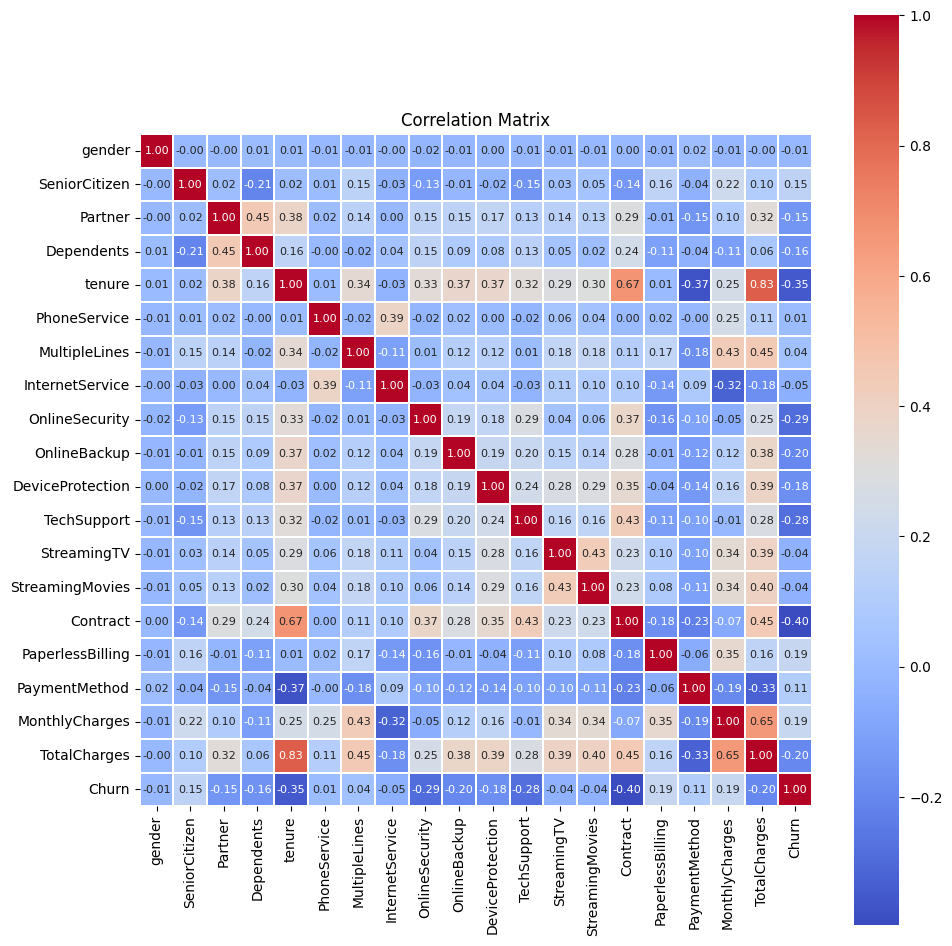

In [52]:
plt.figure(figsize=[10, 10])
sns.heatmap(data_LE.corr(), annot=True , fmt = '.2f', annot_kws={"fontsize": 8},
            linewidths=0.25, center= 0.3,cmap= 'coolwarm', square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [44]:
pipeline_rf = Pipeline([
    ('preprocessing', OneHotEncoder(handle_unknown='ignore')),
    ('classifier', RandomForestClassifier())
])
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
pipeline_lr = Pipeline([
    ('preprocessing', OneHotEncoder(handle_unknown='ignore')),
    ('classifier', LogisticRegression())
])
param_grid_lr = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10]
}
pipeline_svm = Pipeline([
    ('preprocessing', OneHotEncoder(handle_unknown='ignore')),
    ('classifier', SVC())
])
param_grid_svm = {
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10]
}
pipeline_knn = Pipeline([
    ('preprocessing', OneHotEncoder(handle_unknown='ignore')),
    ('classifier', KNeighborsClassifier())
])
param_grid_knn = {
    'classifier__p': [1, 2],
    'classifier__n_neighbors': [3, 5, 7]
}
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf)
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr)
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm)
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn)
grid_search_rf.fit(dataset.drop('Churn', axis=1), dataset['Churn'])
grid_search_lr.fit(dataset.drop('Churn', axis=1), dataset['Churn'])
grid_search_svm.fit(dataset.drop('Churn', axis=1), dataset['Churn'])
grid_search_knn.fit(dataset.drop('Churn', axis=1), dataset['Churn'])

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        OneHotEncoder(handle_unknown='ignore')),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [3, 5, 7],
                         'classifier__p': [1, 2]})

In [45]:
print("Tuned Logistic Regression Parameters: {}".format(grid_search_lr.best_params_))
print("Best score is {}".format(grid_search_lr.best_score_))

Tuned Logistic Regression Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
Best score is 0.797956118136654


In [46]:
print("Tuned Random Forest Parameters: {}".format(grid_search_rf.best_params_))
print("Best score is {}".format(grid_search_rf.best_score_))

Tuned Random Forest Parameters: {'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Best score is 0.792702956642364


In [47]:
print("Tuned SVM Parameters: {}".format(grid_search_svm.best_params_))
print("Best score is {}".format(grid_search_svm.best_score_))

Tuned SVM Parameters: {'classifier__C': 0.01, 'classifier__kernel': 'linear'}
Best score is 0.7985229893864121


In [48]:
print("Tuned KNN Parameters: {}".format(grid_search_knn.best_params_))
print("Best score is {}".format(grid_search_knn.best_score_))

Tuned KNN Parameters: {'classifier__n_neighbors': 7, 'classifier__p': 1}
Best score is 0.7661503363120201


In [49]:
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(data_LE.drop('Churn',axis=1), data_LE['Churn'], test_size=0.2, random_state=42)
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(data_OHE.drop('Churn',axis=1), data_OHE['Churn'], test_size=0.2, random_state=42)

In [50]:
X_train_le.shape
X_train_ohe.shape

(5634, 19)

Logistic Regression Accuracy: 0.8176011355571328
Logistic Regression Confusion Matrix:


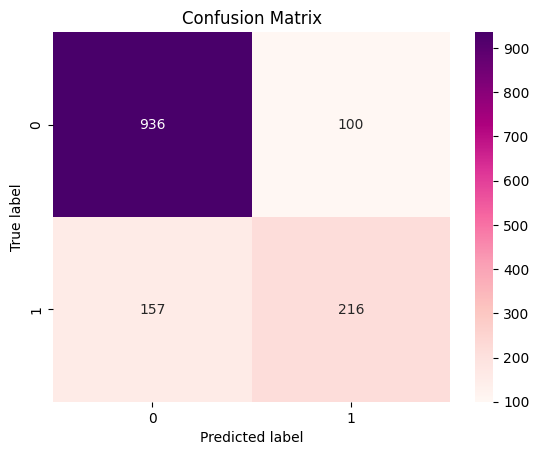

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

SVM Accuracy: 0.8147622427253371
SVM Confusion Matrix:


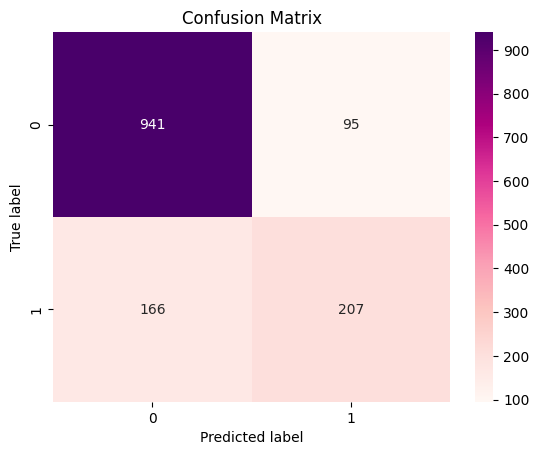

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409

KNN Accuracy: 0.7792760823278921
KNN Confusion Matrix:


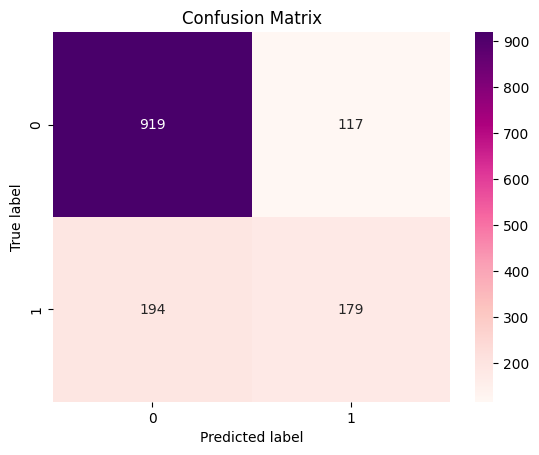

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.60      0.48      0.54       373

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409

Random Forest Accuracy: 0.8076650106458482
Random Forest Confusion Matrix:


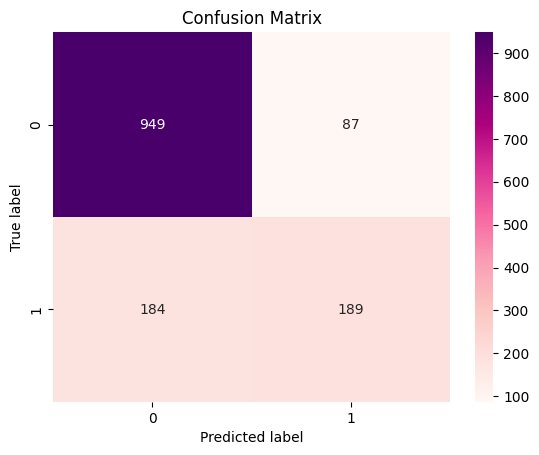

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.68      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [51]:
models_list = {
    'Logistic Regression': LogisticRegression(C=0.1, penalty='l2'),
    'SVM': SVC(kernel='linear', C=0.01),
    'KNN': KNeighborsClassifier(p = 1, n_neighbors = 7),
    'Random Forest': RandomForestClassifier(n_estimators = 300, min_samples_split = 10, min_samples_leaf = 1)
}
for name, model in models_list.items():
    model.fit(X_train_le, y_train_le)
    y_pred_le = model.predict(X_test_le)
    print(name, "Accuracy:", accuracy_score(y_test_le, y_pred_le))
    print(name, "Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test_le, y_pred_le), annot = True, cmap = 'RdPu', fmt = '0.0f')
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(name, "Classification Report:\n", classification_report(y_test_le, y_pred_le))
    print('===================================================================================')
